In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.4.2'

In [3]:
#!pip install pyarrow

In [4]:
df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [6]:
import sklearn

In [7]:
sklearn.__version__

'1.0.2'

In [8]:
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [9]:
df['time_duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,time_duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,0 days 00:19:48
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,0 days 00:06:36
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,0 days 00:17:55
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,0 days 00:08:18
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,0 days 00:06:06


In [10]:
df["time_duration_min"] = pd.to_timedelta(df["time_duration"]).dt.total_seconds()/60
df["time_duration_sec"] = pd.to_timedelta(df["time_duration"]).dt.total_seconds()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,time_duration,time_duration_min,time_duration_sec
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,...,0.5,0.00,0.0,1.0,22.70,2.5,0.0,0 days 00:19:48,19.800000,1188.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,...,0.5,3.75,0.0,1.0,18.75,2.5,0.0,0 days 00:06:36,6.600000,396.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,...,0.5,3.00,0.0,1.0,31.30,2.5,0.0,0 days 00:17:55,17.916667,1075.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,...,0.5,2.00,0.0,1.0,17.00,2.5,0.0,0 days 00:08:18,8.300000,498.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,...,0.5,3.20,0.0,1.0,16.10,2.5,0.0,0 days 00:06:06,6.100000,366.0


In [11]:
# this is our target variable time_duration_min

In [12]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'time_duration',
       'time_duration_min', 'time_duration_sec'],
      dtype='object')

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_duration_min', ylabel='Density'>

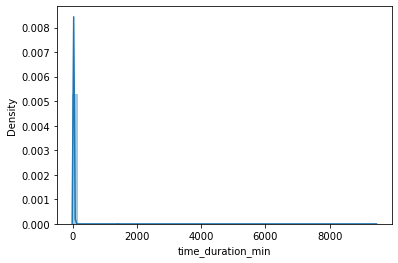

In [13]:
sns.distplot(df.time_duration_min)

In [14]:
df.time_duration_min.describe()

count    2.964624e+06
mean     1.561295e+01
std      3.485105e+01
min     -1.356667e+01
25%      7.150000e+00
50%      1.163333e+01
75%      1.868333e+01
max      9.455400e+03
Name: time_duration_min, dtype: float64

In [15]:
# count    2,964,624  (almost 3 million records, large dataset (good for reliability)
# mean     15.61   (these values are minutes, Most durations are around 10–15 minutes, 
#                     Since the mean is higher than the median, data is right-skewed)
#50%      11.63


# std      34.85    (This is more than 2x the mean, which means,data varies a lot Many short durations + a few very long ones)

# min     -13.56  (Time duration should not be negative, some data issue)

# 25%       7.15   (25% of values are below 7.15 min,75% of values are below 18.68 min,So,Half of data lies between 7 & 19 min)
# 75%      18.68

# max    9455.40   (very large, This is not normal for most time durations.)




# ⚠️ Data issues:
#Negative values (invalid)
#Extremely large values (outliers)
#📈 Distribution:

#Right-skewed
#Not normal
#Influenced by outliers


In [16]:
# lets check for negative time duration 

In [18]:
df.shape

(2964624, 22)

In [19]:
df1=df[df['time_duration_min']<0]
df1.shape

(56, 22)

In [22]:
# valid time duration data
df_valid=df[df['time_duration_min']>0]
df_valid.shape

(2963754, 22)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_duration_min', ylabel='Density'>

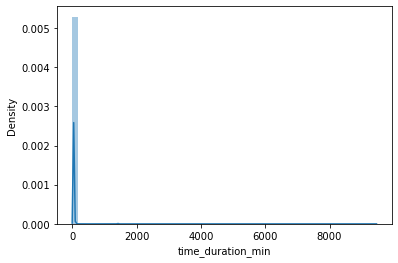

In [24]:
sns.distplot(df_valid.time_duration_min)

In [26]:
df_valid.time_duration_min.describe()

count    2.963754e+06
mean     1.561756e+01
std      3.485513e+01
min      1.666667e-02
25%      7.150000e+00
50%      1.163333e+01
75%      1.868333e+01
max      9.455400e+03
Name: time_duration_min, dtype: float64

In [28]:
# we can check data at maximum levels also to see in which duration max data lies
df_valid.time_duration_min.describe(percentiles=[0.95, 0.98, 0.99])

count    2.963754e+06
mean     1.561756e+01
std      3.485513e+01
min      1.666667e-02
50%      1.163333e+01
95%      3.795000e+01
98%      5.100000e+01
99%      6.045000e+01
max      9.455400e+03
Name: time_duration_min, dtype: float64

In [ ]:
# 99% of users finish within ~1 hour,  This is a strong operational insight.
# Mean > Median,  means data is right-skewed
# Most sessions are around 10–15 minutes
# Median = 11.6 min → very representative
# Mean is higher due to long sessions

In [31]:
# lets take relevant data in which we will take more than 1 min duration of taxi and less thatn 60 min

df_filtered=df_valid[(df_valid['time_duration_min']>=1) & (df_valid['time_duration_min']<=60)]
df_filtered

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,time_duration,time_duration_min,time_duration_sec
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,...,0.5,0.00,0.00,1.0,22.70,2.5,0.0,0 days 00:19:48,19.800000,1188.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,...,0.5,3.75,0.00,1.0,18.75,2.5,0.0,0 days 00:06:36,6.600000,396.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,...,0.5,3.00,0.00,1.0,31.30,2.5,0.0,0 days 00:17:55,17.916667,1075.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,...,0.5,2.00,0.00,1.0,17.00,2.5,0.0,0 days 00:08:18,8.300000,498.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,...,0.5,3.20,0.00,1.0,16.10,2.5,0.0,0 days 00:06:06,6.100000,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,...,0.5,2.00,0.00,1.0,21.77,NaN,NaN,0 days 00:08:37,8.616667,517.0
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,...,0.5,2.34,0.00,1.0,25.74,NaN,NaN,0 days 00:14:45,14.750000,885.0
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,...,0.5,0.00,0.00,1.0,23.97,NaN,NaN,0 days 00:19:00,19.000000,1140.0
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,...,0.5,5.58,0.00,1.0,33.46,NaN,NaN,0 days 00:17:51,17.850000,1071.0


In [32]:
df_valid.shape

(2963754, 22)

In [33]:
df_filtered.shape

(2898906, 22)

In [34]:
df_filtered.nunique()

VendorID                       3
tpep_pickup_datetime     1558546
tpep_dropoff_datetime    1558704
passenger_count               10
trip_distance               3802
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 257
DOLocationID                 261
payment_type                   5
fare_amount                 8107
extra                         46
mta_tax                        5
tip_amount                  3800
tolls_amount                 994
improvement_surcharge          4
total_amount               17404
congestion_surcharge           6
Airport_fee                    3
time_duration               3541
time_duration_min           3541
time_duration_sec           3541
dtype: int64